In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
basics_DF = pd.read_csv('D:/Data analyst/Wild code school/Projets/Projet 2 - Pandas/BD/Christophe_DataFrame.csv', sep = ',')

In [3]:
basics_DF.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama
1,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime"
2,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
3,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
4,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"


In [5]:
#Pour comparer ce qui est comparable, je ne prends que les movies non "short"
film1 = basics_DF[basics_DF.titleType.isin (['movie'])]
film2 = film1[film1["genres"].apply(lambda x:x not in ['short'])]

In [25]:
#Supprime les lignes avec des "\N"
aVirer = film2.index[film2.iloc[:,7] == (r'\N')]
film2.drop(aVirer,0, inplace=True)

C:\Users\clefe\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [26]:
#Transforme en integer la colonne
film2['runtimeMinutes'] = film2['runtimeMinutes'].astype('int')

In [41]:
film3 = film2.groupby(['startYear']).mean()
film3 = film3.reset_index()

In [42]:
film3 = film3[(film3['startYear']<2021)]

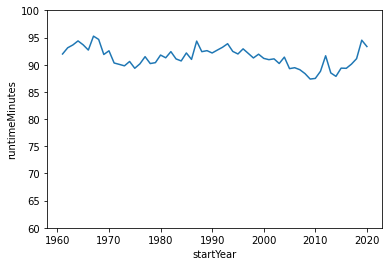

In [49]:
sns.lineplot(x='startYear', y = 'runtimeMinutes', data = film3)
plt.ylim(60,100)
plt.show()


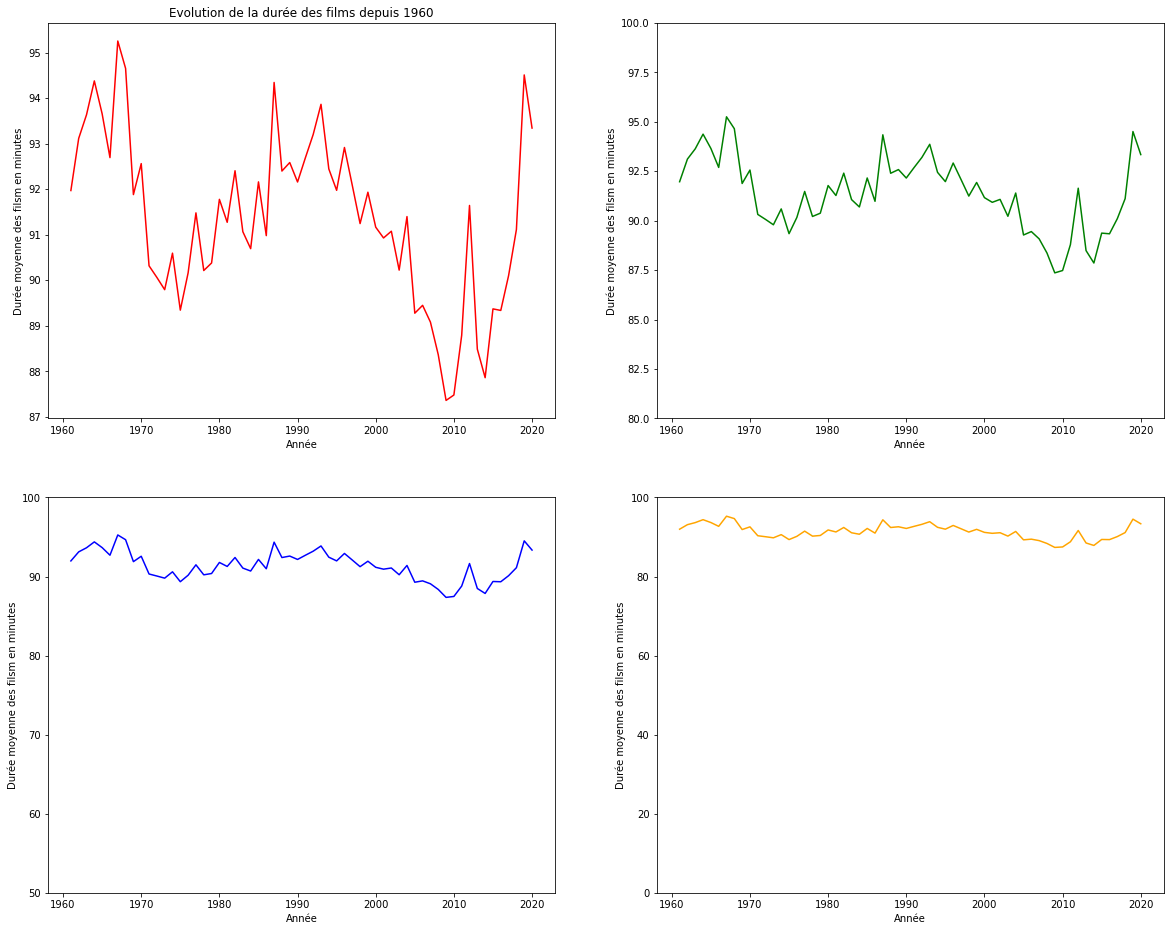

In [83]:
#Mise en place des graphiques
fig, ax = plt.subplots(figsize = (20,16))


#1er graphique
ax1 = plt.subplot(221)
ax1 = sns.lineplot(x='startYear', y = 'runtimeMinutes', data = film3, color = 'red')
ax1.set_title('Evolution de la durée des films depuis 1960')
ax1 = plt.xlabel('Année')
ax1 = plt.ylabel('Durée moyenne des filsm en minutes')

#2ème graphique
ax2 = plt.subplot(222)
ax2 = sns.lineplot(x='startYear', y = 'runtimeMinutes', data = film3, color = 'green')
ax2 = plt.ylim(80,100)
#ax2.set_title('Evolution de la durée des films depuis 1960')
ax2 = plt.xlabel('Année')
ax2 = plt.ylabel('Durée moyenne des filsm en minutes')

#3ème graphique
ax3 = plt.subplot(223)
ax3 = sns.lineplot(x='startYear', y = 'runtimeMinutes', data = film3, color = 'blue')
ax3 = plt.ylim(50,100)
#ax3.set_title('Evolution de la durée des films depuis 1960')
ax3 = plt.xlabel('Année')
ax3 = plt.ylabel('Durée moyenne des filsm en minutes')

#4ème graphique
ax4 = plt.subplot(224)
ax4 = sns.lineplot(x='startYear', y = 'runtimeMinutes', data = film3, color = 'orange')
ax4 = plt.ylim(0,100)
#ax4.set_title('Evolution de la durée des films depuis 1960')
ax4 = plt.xlabel('Année')
ax4 = plt.ylabel('Durée moyenne des filsm en minutes')

plt.show()